In [74]:
import numpy as np
import matplotlib.pyplot as plt

In [75]:
path_saves = "res"
rewards = np.load(f"{path_saves}/rewards.npy")
epsilons = np.load(f"{path_saves}/epsilon.npy")

In [76]:
rewards.shape, epsilons.shape

((50601,), (50601,))

In [77]:
average_rewards = []
sampled = []
for i, r in enumerate(rewards[:-100]):
    average_rewards.append(rewards[i:i+100].mean())
    if i % 100 == 0:
        sampled.append(rewards[i])
average_rewards = np.array(average_rewards)

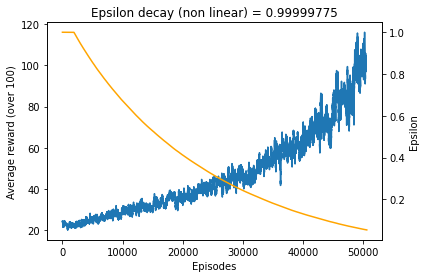

In [78]:
plt.title("Epsilon decay (non linear) = 0.99999775")
plt.plot(average_rewards)
ax = plt.gca()
ax.set_xlabel('Episodes')
ax.set_ylabel('Average reward (over 100)')
plt.twinx()
ax = plt.gca()
ax.set_ylabel('Epsilon')
plt.plot(epsilons, 'orange')

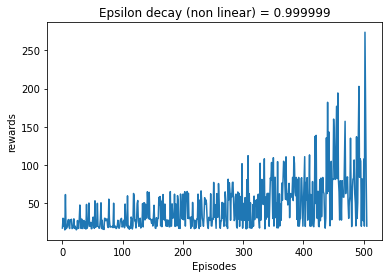

In [79]:
plt.title("Epsilon decay (non linear) = 0.999999")
plt.plot(sampled)
ax = plt.gca()
ax.set_xlabel('Episodes')
ax.set_ylabel('rewards')

In [80]:
epsilons[-1]

0.05363226340005344

In [81]:
def get_hist(rewards, minid, maxid, ax, width=20):
    hist, bin_edges = np.histogram(rewards[minid:maxid], bins='auto', density=True)
    ax.bar(bin_edges[:-1], hist, width)

/home/seladus/.local/lib/python3.8/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


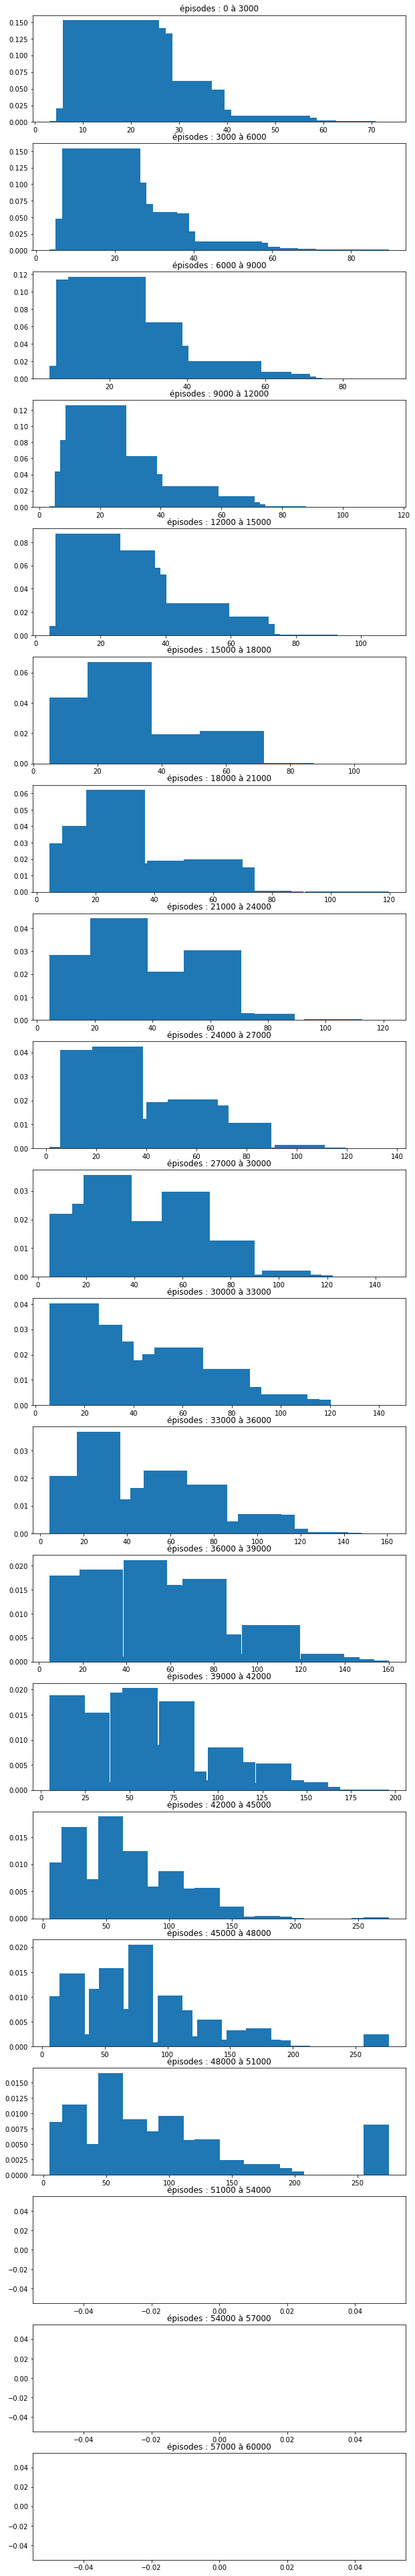

In [82]:
nb_plots = 20
ratio = 3
fig, axs = plt.subplots(nb_plots, figsize=(10, 70))
for i in range(nb_plots):
    minid = i*1000*ratio
    maxid = i*1000*ratio+1000*ratio
    axs[i].set_title(f"épisodes : {minid} à {maxid}")
    get_hist(rewards, minid, maxid, ax=axs[i], width=20)